# Додаткові завдання №2

## 1 Візуалізація емпіричної імовірності
Побудуйте графік залежності емпіричної імовірності випадіння герба (HEAD) від кількості підкидань чесної монети (симуляцій).

**Зауваження.** Завдання передбачає використання бібліотеки [Matplotlib](https://matplotlib.org/).

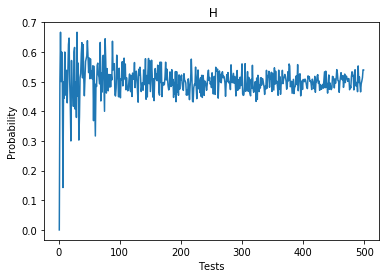

In [11]:
from numpy.random import choice
import matplotlib.pyplot as plt
%matplotlib inline

def count(a):
    return list(choice(['H', 'T'], a)).count('H') / a



a = range(1, 500)
b = [count(i) for i in a]

plt.plot(a, b)
plt.title(' H')
plt.xlabel('Tests')
plt.ylabel('Probability')
plt.show()

## 2 Найбільше число
Реалізуйте функцію підрахунку точної (теоретичної) імовірності того, що максимальне число після $n$ кидків різних гральних кубиків із кількістю сторін $f = \{ f_i \}_{i = 1}^{n}$ дорівнює $x\_max$, для таких параметрів:
- $f = \{ 2, 5, 8 \}, x\_max = 8$
- $f = \{ 3, 4 \}, x\_max = 2$
- $f = \{ 2, 5, 7, 3 \}, x\_max = 3$

Тобто, якщо $X_i, i = 1, \ldots, n$, - число на $i$-му кидку кубика, а $X = \max\limits_{1 \leq i \leq n} X_i$, то потрібно знайти ймовірність $\textbf{P} \left( X = x\_max \right)$.

Підрахуйте також емпіричні ймовірності відповідних подій у випадку $10000$ симуляцій.

**Зауваження.** Якщо введені параметри не мають сенсу, то повертати $0$.
Наприклад, якщо при $f = \{ 4, 8, 3 \}$ вводиться $x\_max < 1$ або $x\_max > 8$.

In [9]:
from itertools import product


def check(elem, x_max):
    return max(list(elem)) == x_max


def empiric(f, x_max, tests=10000):
    if (x_max < 1 or x_max > max(list(f))):
        return 0
    count = 0
    for _ in range(tests):
        k = [choice(range(1, j+1)) for j in f]
        if check(k, x_max):
            count += 1
    return count / tests 


def theor(f, x_max):
    if (x_max < 1 or x_max > max(list(f))):
        return 0
    n = 0
    count = 0
    for elem in product(*[range(1, i+1) for i in f]):
        count += 1
        if check(elem, x_max):
            n += 1
    return n / count

f = [[2, 5, 8], [3, 4], [2, 5, 7, 3]]
x_max = [8, 2, 3]

for i in range(3):
    print('f = {}, x_max = {}: \nempirical = {}, theoretical = {}\n\n'.format(f[i], x_max[i], empiric(f[i], x_max[i]), theor(f[i], x_max[i])))

f = [2, 5, 8], x_max = 8: 
empiric = 0.1234, theor = 0.125


f = [3, 4], x_max = 2: 
empiric = 0.2524, theor = 0.25


f = [2, 5, 7, 3], x_max = 3: 
empiric = 0.1807, theor = 0.18095238095238095




## 3 Сума чисел
Реалізуйте функцію підрахунку точної (теоретичної) імовірності того, що сума чисел після $n$ кидків різних гральних кубиків із кількістю сторін $f = \{ f_i \}_{i = 1}^{n}$ дорівнює $s$, для таких параметрів:
- $f = \{ 3, 4, 5 \}, s = 13$
- $f = \{ 2, 2 \}, s = 3$
- $f = \{ 3, 4, 5 \}, s = 7$

Тобто, якщо $X_i, i = 1, \ldots, n$, - число на $i$-му кидку кубика, а $X = \sum\limits_{i = 1}^{n} X_i$, то потрібно знайти ймовірність $\textbf{P} \left( X = s \right)$.

Підрахуйте також емпіричні ймовірності відповідних подій у випадку $10000$ симуляцій.

**Зауваження.** Якщо введені параметри не мають сенсу, то повертати $0$.
Наприклад, якщо при $f = \{ 4, 6, 3 \}$ вводиться $s < 3$ або $s > 13$.

In [10]:
def check(elem, s):
    return sum(list(elem)) == s


def empir(f, s, tests=10000):
    if (s < len(f) or sum(f) < s):
        return 0
    count = 0
    for n in range(tests):
        k = [choice(range(1, i+1)) for i in f] 
        if check(k, s):
            count += 1
    return count / tests


def theoret(f, s):
    if (s < len(f) or sum(f) < s):
        return 0
    c = 0
    count = 0
    for elem in product(*[range(1, i+1) for i in f]):
        count += 1
        if check(elem, s):
            c += 1
    return c / count

f = [[3, 4, 5], [2, 2], [3, 4, 5]]
s = [13, 3, 7]

for i in range(3):
    print('f = {}, s = {}: \nempirical = {}, theoretical = {}\n\n'.format(f[i], s[i], empir(f[i], s[i]), theoret(f[i], s[i])))

f = [3, 4, 5], s = 13: 
empirical = 0, theoretical = 0


f = [2, 2], s = 3: 
empirical = 0.5099, theoretical = 0.5


f = [3, 4, 5], s = 7: 
empirical = 0.1781, theoretical = 0.18333333333333332


